# Introduction to `Julia`

In this lecture, we are going to conside `Julia` programming language, a relatively new (initiated in 2012) computational tool for _scientific computing_ and _statisitcal computing_.

## Programming language performance

There exist several excelent tools for perfoming _scientific/statistical computations_ such as _comercial products_ like `MatLab`, `Maple`, and `Mathematica`, or the _free ones_ like `C`/`C++`, `Fortran`, `Octave`, `Python`, and `R` with there own _pros_ and _cons_.

While uisng a computational tool (programming language) for the problem solving, one should keep in mind the following aspects of the the development process:

- _**development speed**_ -- how long does it take to _**write the code**_ to solve the problem?
- _**runtime speed**_ -- how long does it take to _**run the code**_ on a computer?

Compiled languages such as `C/C++` and `Fortran` have been usually a preferred choice for solving _scientific computing_ problems due to their great performance in terms of runtime. However, those languages require a more careful and detailed approach to the code creation, which affects the development time.

On the contrary, the languages specifically designed to tackle scientific problems such as MatLab, Python, R, etc., result in fast development time but struggle with runtime speed.

![A schematic of run speed versus development speed](figures/lecture07-fig01-julia-tradeoff.png)

On the picture, one can see a scematic trade-off between _runtime speed_ and _development speed_. For instance,
it would be fair to say that "`R` is generally faster to code than `C`'' and "`C` generally runs faster than `R`".

## `Julia` enters the room

The `Julia` language has been developed in the last decade, and it is a programming language designed with a view of improving the _trade-off between runtime and development_.

Its syntax and style is somewhat similar to `R`, `Python`, and `MATLAB`/`Octave` but the performance is comparable to that of `C`/`C++` and `Fortran`. `Julia` attempts to break the so-called _**two-language problem**_, which means that practitioners may _**quickly create code**_ in Julia, and the code also _**runs quickly**_. 

Further, re-factoring, improving, iterating, and optimizing code can be done in `Julia`, and does not require the code to be ported to `C`/`C++` or `Fortran`. In contrast to `Python`, `R`, and other high-level languages, the `Julia` standard libraries, and almost all of the `Julia` code base is written in `Julia`.

## Language overview

`Julia` is a _scientific programming language_, which is perfectly suited for solving problems in _statistics_, _machine learning_, _data science_, as well as for _light_ and _heavy numerical computational tasks_. It can be used for creating _user-level applications_; however, it is not typically done.

It is an _open-source language_ with a broad community around it, bringing together contributors from different worlds such as scientific computing, statistics, and data-science. It has programmatic simplicity similar to Python combined with speed similar to `C`, which allows `Julia` taking an active part of the data science development. Some believe that _**`Julia` may overtake Python and R to become the primary
language of data science in the future**_. For more details, visit [https://julialang.org/](https://julialang.org/).

### `Julia`'s main fetaures

A key distinction between Julia and other high-level scientific computing languages is that `Julia` is _**strongly typed**_, which means that _**every variable or object has a distinct type**_ that can either explicitly or implicitly be defined by the programmer. This allows the `Julia` system to work eﬃciently and integrate well with `Julia`'s _**just-in-time**_ (JIT) compiler.

The standard `Julia` libraries, and almost all of `Julia` `Base`, is written in `Julia` itself. Even primitive operations such as integer arithmetic are written in `Julia`. The language features a variety of additional packages. All of these packages, including the language and system itself, are free and open source
(MIT licensed).

While it is possible, there is _**no need to vectorize code**_ for performance.

There is eﬃcient support for Unicode, including but not limited to UTF-8.

`C` can be called directly from Julia.

## A few basic commands

In [78]:
println("Hello, world!")

Hello, world!


Let us conside a bit more complicated example.

In [79]:
language = ["English", "Swedish", "Finnish", "German", "French", "Spanish"]
hello = ["Hello", "Hej", "Hei", "Hallo", "Bonjour", "¡Hola"]
world = ["world", "världen", "maailma", "welt", "le monde", "mundo"]

for (lang, hello_word, world_word) in zip(language, hello, world)
    println("\"Hello, world!\" in ", lang, " is ", "\"", hello_word, ", ", world_word, "!\"")
end

"Hello, world!" in English is "Hello, world!"
"Hello, world!" in Swedish is "Hej, världen!"
"Hello, world!" in Finnish is "Hei, maailma!"
"Hello, world!" in German is "Hallo, welt!"
"Hello, world!" in French is "Bonjour, le monde!"
"Hello, world!" in Spanish is "¡Hola, mundo!"


In [81]:
# checking a type of `language` avriable
typeof(language)

Vector{String} (alias for Array{String, 1})

In the example above, we are printing "Hello, world!" in different languages. We have three _arrays_:

- `laguage` contains names of several langiages we are going to use.
- `hello` is an array of the words "Hello" in the corresponding language.
- `world` is an array of the words "world" in the corresponding language.

We use a _loop_ `for` to print the phrase in different langiages. The loop is done over all triples: (language, "hello" word, and "world" word), where there is a strict correspondence between the language and the words. This is done by _zipping_ array with the `zip` command. At any iterations, we use `println` to print the phrase. 

When exploring statistics and other forms of numerical computation, it is often useful to use a _**comprehension**_ as a basic programming construct. A typical form of a comprehension is:

`[f(x) for x in A]`.

Here, `A` is some array or a collection of objects. As a result of the comprehension is an _**array of elements**_, where each element `x` of `A` is transformed via `f(x)`. Comprehensions are useful due to their _**expressiveness**_ and _**simplicity**_. 

Here, there are some examples:

In [84]:
array1 = [(2n+1)^2 for n in 1:5]
array2 = [sqrt(i) for i in array1]
println(typeof(1:5), " ", typeof(array1), " ", typeof(array2))
1:5, array1, array2

UnitRange{Int64} Vector{Int64} Vector{Float64}


(1:5, [9, 25, 49, 81, 121], [3.0, 5.0, 7.0, 9.0, 11.0])

The array `array1` is created in line 1 with the elements $\{(2n+1)^2: n \in \{1, . . . , 5\}\}$ in order. 

_**Observe the literal 2 in the multiplication $2n$, without explicit use of the \* symbol**_. 

In the next line, the array `array2` is created. It is also possible to use `sqrt.(array1)` command, where `.` indicates that a function is applied _point-wise_. 

Then, we print the `typeof()` three expressions:

- The type of `1:5` (used to create `array1`) is a `UnitRange` of `Int64`. It is a special type of object that
encodes the integers $1, \ldots, 5$ without explicitly allocating memory. Then the types of both `array1`
and `array2` are `Vector` types, and they contain values of types `Int64` and `Float64`, respectively. 

Finally, a _**tuple of values**_ is created through the use of a comma between `1:5`, `array1`, and `array2`.

Observe that in the output, the values of the second element of the tuple are _**printed as integers**_ (no
decimal point) while the values of the third element are _**printed as floating point numbers**_.

In [91]:
function f(x)
    return sin(x) + 5cos(x)
end

@. f(array1)

5-element Vector{Float64}:
 -4.143532824181628
  4.8236623092195945
  0.5492100659587137
  3.253541915833702
  0.7554971787228101

## Getting help

The oﬃcial Julia documentation can be found at [https://docs.julialang.org/](https://docs.julialang.org/).

While using Julia, help may be obtained through the use of `?`. For example, run `? sqrt` to get information about `sqrt()` function.

You may also find it useful to apply the `methods()` function. For example,

In [4]:
methods(sqrt)

# 19 methods for generic function "sqrt" from Base:
  [1] sqrt(x::BigFloat)
     @ Base.MPFR mpfr.jl:695
  [2] sqrt(::Missing)
     @ Base.Math math.jl:1533
  [3] sqrt(a::Float16)
     @ Base.Math math.jl:1511
  [4] sqrt(x::BigInt)
     @ Base.MPFR mpfr.jl:703
  [5] sqrt(a::ComplexF16)
     @ Base.Math math.jl:1512
  [6] sqrt(A::LinearAlgebra.UpperTriangular)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2391
  [7] sqrt(A::LinearAlgebra.UnitUpperTriangular{T, S} where S<:AbstractMatrix{T}) where T
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2392
  [8] sqrt(A::LinearAlgebra.Hermitian{T, S} where S<:(AbstractMatrix{<:T}); rtol) where T<:Complex
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:823
  [9] sqrt(D::LinearAlgebra.Diagonal)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/diagonal.jl:802
 [10] sqrt(J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/uniformscaling.jl:173
 [11] sqrt(z::Complex)
     @ complex.jl:530
 [12] sqrt(A::LinearAlgebra.Adjoint{T, <:AbstractMatrix} where T)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:935
 [13] sqrt(A::LinearAlgebra.Transpose{T, <:AbstractMatrix} where T)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:936
 [14] sqrt(A::LinearAlgebra.UnitLowerTriangular)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2411
 [15] sqrt(A::LinearAlgebra.LowerTriangular)
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/triangular.jl:2410
 [16] sqrt(A::Union{LinearAlgebra.Hermitian{T, S}, LinearAlgebra.Symmetric{T, S}} where S; rtol) where T<:Real
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/symmetric.jl:812
 [17] sqrt(A::AbstractMatrix{T}) where T<:Union{Real, Complex}
     @ LinearAlgebra /Applications/Julia-1.11.app/Contents/Resources/julia/share/julia/stdlib/v1.11/LinearAlgebra/src/dense.jl:905
 [18] sqrt(x::Union{Float32, Float64})
     @ Base.Math math.jl:607
 [19] sqrt(x::Real)
     @ Base.Math math.jl:1528

The output is a list of diﬀerent `Julia` methods that have been implemented for the function `sqrt()`. `Julia` allows implementing a given function in _**diﬀerent ways depending on diﬀerent input arguments**_, where each diﬀerent implementation is a method. 

This is called _**multiple dispatch**_. Here, the various methods of `sqrt()` are shown for diﬀerent types of input arguments.

## Runtime speed and performance

`Julia` feels like an _**interpreted language**_ as opposed to a compiled language. The explicit compilation is not required before running the code. However, behind the scenes, the JIT compiler _**compiles every new function and code snippet**_ as it is needed. 

The latter often means that on a _**first execution of a function**_, _**runtime is much slower**_ than
the second, or subsequent runs. 

Thus, while adding a package to a project by `using` command on a first call, a user may sometimes _**wait a few seconds**_ for the package to compile. However, afterwards, no such wait is needed.

For day-to-day programming tasks, a user often doesn't need to give much thought to performance and run speed with `Julia`, since `Julia` is inherently fast. For instance, a simple Monte Carlo simulations involving $10^6$ random sampling points typically run in less than a second, and are very easy to code. 

However, as you progress into more complicated projects, many repetitions of the same code block may merit _**profiling**_ and _**optimization**_ of the code in question. Hence, you may wish to carry out _**basic profiling**_.

Let us consider two examples:

In [92]:
using Statistics

# number of sampling points 
nsmp = 500

# number of repetitions (Monte Carlo simulations)
nsim = 10^6

@time begin
    data = Float64[]
    for _ in 1:nsim
        group = Float64[]
        for _ in 1:nsmp
            push!(group,rand())
        end
        push!(data,mean(group))
    end
    println("98% of the means lie in the estimated range: ", (quantile(data,0.01),quantile(data,0.99)) )
end

98% of the means lie in the estimated range: (0.47002100308702033, 0.5300025646666469)
 18.539534 seconds (511.00 M allocations: 22.279 GiB, 9.00% gc time)


In [96]:
using Statistics

# number of sampling points 
nsmp = 500

# number of repetitions (Monte Carlo simulations)
nsim = 10^6

@time begin
    data = [mean(rand(nsmp)) for _ in 1:nsim]
    println("98% of the means lie in the estimated range: ", (quantile(data,0.01),quantile(data,0.99)))
end

98% of the means lie in the estimated range: (0.4699491061186157, 0.5300082979358517)
  1.009736 seconds (4.03 M allocations: 3.913 GiB, 30.35% gc time, 2.22% compilation time)


In [95]:
mean(rand(500))

0.5021822675937245

In [97]:
data = zeros(Float64, 10)

10-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

The two pieces of code above performs the same task: 

- sampling 500 random numbers;
- computing their mean;
- repeating the first two steps $10^6$ times;
- calculating $98\%$ confidence interval of the means.

Both produce similar results but are very different in terms of the performance. The first code requires ~ 17 times more computational time. The second code is much faster because far _**fewer memory allocations are made**_. Note that "`gc time`" stands for "garbage collection" and quantifies what percentage of the running time `Julia` was busy with internal memory management.

Both codes use the `Statistics` package, required for the `mean()` function. A command `data = Float64` (in the first code) creates an empty array of type `Float64`, data; a command `group=Float64` creates an empty array, `group`. Then, in the first code, we loop 500 times, each time pushing to the array, `group`, a new random value generated from `rand()` -- a command `push!(group,rand())`.

The `push!()` function here uses the naming convention of having an _**exclamation mark**_ when the
_**function modifies the argument**_. This is not part of the Julia language, but rather decorates the name
of the function. In this case, it _**modifies `group` by appending another new element**_ -- here, there is _**one point where the code is ineﬃcient**_. The `Julia` compiler has no direct way of knowing how much memory to allocate for `group` initially, hence some of the calls to `push!()` imply reallocation of the array and
copying. 

a command `push!(data,mean(group))` is of a similar nature. The composition of` push!()` and `mean()` imply that the new mean (average of 500 values) is pushed into data. However, some of these calls to `push!()` imply a reallocation. _**At some point the allocated space of data will suddenly run out, and at this point the
system will need to internally allocate new memory, and copy all values to the new location**_. 

This is a big cause of ineﬃciency in our example. The output is created with a `println()` function, where a a tuple is created within `println()`, using `(,)`. Thetwo elements of the tuple are return values from the `quantile()` function which computes the 0.01 and 0.99 quantiles of data. 

The second code is relatively simpler and in this case performance is better. All of the _**computation is carried out in the comprehension**_, `data = [mean(rand(5*10^2)) for _ in 1:10^6]`. 

Writing the code in this way allows the `Julia` compiler to pre-allocate $10^6$ memory spaces for data. Then, applying `rand()` with an argument of 500, indicating the number of desired random values, allows for faster operation.

## Types and Multiple Dispatch

Functions in `Julia` are invoked via _**multiple dispatch**_, which means that a function call is _**based on the type of its inputs**_, i.e. its argument types. Functions may _**have multiple methods of execution**_, which can be checked using the `methods()` command.

`Julia` has a powerful type system which _**allows for user-defined types**_. One can check the type of a
variable using the `typeof()` function, while the functions `subtypes()` and `supertype()` return
the subtypes and supertype of a particular type, respectively. 

As an example, `Bool` is a subtype of `Integer`, while `Real` is the supertype of `Integer`.

![Type hierarchy for `Julia` numbers](figures/lecture07-fog02-types.png)

While coding in `Julia`, it is possible to not specify all variable types; `Julia` will attempt to infer what types the unspecified variables should be, and will then attempt to execute the code using these types. This is known as _**type inference**_. 

However, that if one wants the fastest possible code, then _**it is good to specify the types involved**_. This also helps _**prevent type instability**_ during code execution.

In [100]:
a = 2 // 3

2//3

## Variable Scope, Local Variables, and Global Variables

The _**scope of a variable**_ is the region of code, where the variable is visible. Like almost any
other programming language, `Julia` has rules about variable scope implying that not all variables can
be accessed from everywhere within the program. 

When discussing scope, a key distinction lies between _**local variables**_ and _**global variables**_. The
former refers to variables defined within a function definition or a block of code such as a `for` loop or `while` loop. The latter refers to variables that can potentially be accessed from anywhere in the program.

In general, a _**global variable**_ is a variable _**defined outside**_ of a function or another block of code.

In [103]:
S = 0
for i in 1:10
    c = i^2
    S += c
end
println("S=", S)
println("c=", c) 

S=385


UndefVarError: UndefVarError: `c` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In this example, a variable `S` is a _**global**_ avriable; it is initiated (`S=0`) in the beginning of the script; then, it is modified inside the `for` loop, and the modified value is printed out.

On the contrary, a variable `c` is a _**local**_ variable, its scope is tinside the `for` loop; an attempt to access its value (with `prinltn()` command) utside the loop results in throwing an error (`UndefVarError`).

## Setup and Interface

There are several ways to run `Julia`:

- the REPL (_Read_-_Evaluate_-_Print_-_Loop_) command line interface;
- _Jupyter_ or _Pluto_ notbooks; 
- _VS Code_ IDE (Integrated Development Environment) via `Julia` extension.

`Julia` can be downloaded directly from: https://julialang.org/downloads/.

After the installation, it can be run by the `julia` command in the terminal. The executable must be in the system `PATH`.

To work with `Julia` in _Jupyter_ notebooks, the installation of `IJulia` package is required.

For using `Julia` with the _VS Code_ IDE, follow the instruction in https://code.visualstudio.com/docs/languages/julia.

## The package manager

The core system of `Julia` can be extended by installing packages. This allows users to customize their `Julia` installation depending on their needs, and at the same time oﬀers support for developers who wish to create their own packages, enriching the `Julia` ecosystem. 

Packages may be either _**registered**_, meaning that they are part of the `Julia` package repository, or _**unregistered**_, meaning they are not. 

A list of currently registered packages is available at: https://julialang.org/packages/.

When using the REPL, one can enter the package manager mode by typing `]`. In this mode, packages can be _**installed**_, _**updated**_, or _**removed**_.

The following lists a few of the many useful commands available:

`] add Foo` adds the package `Foo.jl` to the current `Julia` build.

`] status` lists what packages and versions are currently installed.

`] update` updates existing packages.

`] remove Foo` removes package `Foo.jl` from the current `Julia` build.

An alternative which works both in the _REPL_ and in _Jupyter_ notebooks is to use functions from the `Pkg` package. For example,

`using Pkg`

`Pkg.add("Foo")`

This adds the package `Foo.jl`.

## Some useful packages (in alphabetical order)

- `Base.jl` is the basic `Julia` package sitting at the base of the language.
- `CategoricalArrays.jl` provides tools for working with categorical variables.
- `Clustering.jl` provides support for various clustering algorithms.
- `CSV.jl` is a utility library for working with CSV and other delimited files.
- `DataFrames.jl` is a package for working with tabular data.
- `DifferentialEquations.jl` provides eﬃcient Julia implementations of numerical solvers for various types of diﬀerential equations.
- `Distributions.jl` provides support for working with probability distributions.
- `Flux.jl` is a deep learning library written in pure Julia.
- `GLM.jl` is a package for linear models and generalized linear models.
- `HypothesisTests.jl` implements a wide range of hypothesis tests and confidence intervals.
- `IJulia.jl` is required to interface Julia with Jupyter notebooks.
- `Images.jl` is an image processing library.
- `JSON.jl` is a package for parsing and printing JSON.
- `KernelDensity.jl` is a kernel density estimation package.
- `Lasso.jl` implements LASSO model fitting.
- `LaTeXStrings.jl` makes it easier to type LaTeX equations in string literals.
- `LinearAlgebra.jl` provides linear algebra support.
- `Measures.jl` allows building up and representing expressions involving diﬀering types of units that are then evaluated, resolving them into absolute units.
- `MLDatasets.jl` provides an interface for accessing common Machine Learning (ML) datasets.
- `Plots.jl` is one of the main plotting packages in the Julia ecosystem. 
- `PyCall.jl` provides the ability to directly call and fully interoperate with `Python` in `Julia`.
- `PyPlot.jl` provides a Julia interface to the Matplotlib plotting library from `Python`, and specifically to the `matplotlib.pyplot` module.
- `Random.jl` provides support for pseudo random number generation.
- `RCall.jl` provides several diﬀerent ways of interfacing with `R` from `Julia`.
- `RDatasets.jl` provides an easy way to interface with the standard datasets that are available in the core of the `R` language, as well as several datasets included in `R`'s more popular packages.
- `Roots.jl` contains routines for finding roots of continuous scalar functions of a single variable.
- `SpecialFunctions.jl` contains various special mathematical functions, such as Bessel, zeta, digamma, along with sine and cosine integrals, as well as others.
- `Statistics.jl` contains common statistics functions such as mean and standard deviation.
- `StatsBase.jl` provides basic support for statistics including high-order moment computation, counting, ranking, covariances, sampling and cumulative distribution function estimation.
- `StatsModels.jl` allows us to specify models using formulas as common in linear models.
- `StatsPlots.jl` provides extensive statistical plotting recipes.
- `TimeSeries.jl` provides support for working with time series data.

# Crash course by examples

In what follows, we consider some examples of using Julia for solving computational tasks.

## Bubble sort 

In [105]:
# implementation of the Bubble sort algorithm
# input:
#   - an array of numbers
# output:
#   - a modified (sorted) array
#
# here, an exclamation mark ! is used in the end of the function name, 
# which means that the input will be modifed
function bubbleSort!(a)
    n = length(a)
    for i in 1:n-1
        for j in 1:n-i
            if a[j] > a[j+1]
                a[j], a[j+1] = a[j+1], a[j]
            end
        end
    end
    return a
end

data = [65, 51, 32, 12, 23, 84, 68, 1];
println("before sorting:", data)
bubbleSort!(data);
println("after sorting:", data)

before sorting:[65, 51, 32, 12, 23, 84, 68, 1]
after sorting:[1, 12, 23, 32, 51, 65, 68, 84]


## Finding roots of a polynomial

Here, we are finding zeros of a polynomial function:
- we use `Roots.jl` package.
- we create a function `polynomial()` that construct a polynomial function. Its input, `a`, is an array of a polynomial coefficients $a_0, a_1, \ldots, a_n$; a _splat operator_ `...` indicates that the function will accept comma separated parameters with an _**unspecified number**_ of parameters. The function returns a polynomial function of $x$.
- to find zeros of the polynomial cinstructed, we use `find_zeros()` function form the `Roots.jl` package. The function accepts our polynomial function as the first argument, and a search interval bounds as the second and the third argument respectively. We round results up to two digits after the floating point.
- we print zeros found as well as the polynomial function values (to check that they are zeros).

In [9]:
using Roots

function polynomial(a...)
    # a degree of a polynomial
    n = length(a)-1

    polynomial_fcn = function(x)
        return sum([a[i+1]*x^i for i in 0:n])
    end

    return polynomial_fcn
end

poly = polynomial(1, 3, -10)
roots = find_zeros(poly, -10, 10)
roots = round.(roots, digits = 2)
println("Roots of the function f(x): ", roots)
println("f(", roots[1], ")=", poly(roots[1]))
println("f(", roots[2], ")=", poly(roots[2]))

Roots of the function f(x): [-0.2, 0.5]
f(-0.2)=-1.6653345369377348e-16
f(0.5)=0.0


## Solving differential equations

Let us solve a _Lorenz_ system of differential equations

$$\left\{
\begin{aligned}    
\dot{x} &= \sigma(y-z) \\
\dot{y} &= x(\rho-z) - y \\
\dot{z} &= xy - \beta z
\end{aligned}
\right.
$$

with $\sigma = 10, \rho = 28, \beta= 8/3$ and initial condition $x_0 = 0, y_0 = 1, z_0 = 20$.

We are going to use a `DifferemtialEquations` package.

In [106]:
# loading package
using DifferentialEquations

The first step is defining a `Julia` function that represents a right-hand side of the Lorenz system. 

In [107]:
function lorenz!(du, u, p, t)
    du[1] = p[1] * (u[2] - u[1])
    du[2] = u[1] * (p[2] - u[3]) - u[2]
    du[3] = u[1] * u[2] - p[3] * u[3]
end

lorenz! (generic function with 1 method)

The next step is defining an ODE problem by creating a `Julia` object of a corresponding type.

In [19]:
# model parameters
p = [10, 28, 2/3]

# initial condition
u0 = [0.0, 1.0, 20.0]

# time interval
tspan = (0.0, 10.0)

# ODE problem
ode_problem = ODEProblem(lorenz!, u0, tspan, p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 10.0)
u0: 3-element Vector{Float64}:
  0.0
  1.0
 20.0

Now, we can solve the problem.

In [111]:
solution = solve(ode_problem)

retcode: Success
Interpolation: 3rd order Hermite
t: 100-element Vector{Float64}:
  0.0
  0.00014134719575169087
  0.0015548191532685995
  0.008248768053730652
  0.021534176602702737
  0.040103188298736145
  0.06413037558854341
  0.09462214978974069
  0.1321648594759784
  0.1780023970531977
  ⋮
  9.198461737676553
  9.319128265757989
  9.455308918881945
  9.601770712959626
  9.71511570322468
  9.802420547172527
  9.886616872788835
  9.966038217499698
 10.0
u: 100-element Vector{Vector{Float64}}:
 [0.0, 1.0, 20.0]
 [0.0014123740094147718, 0.9998594616283388, 19.998115559347113]
 [0.015416421300953675, 0.9985426557878212, 19.97929182137154]
 [0.07891912195793932, 0.994444081396862, 19.890646590893194]
 [0.19279627223258583, 0.9961858128208525, 19.717058490354834]
 [0.33059673179273985, 1.0186721435314676, 19.479375883979355]
 [0.48364990163396365, 1.078838699364057, 19.180059183349826]
 [0.6558726019223006, 1.2011445168172787, 18.813749314587472]
 [0.8609525402820909, 1.420017920749219, 

For more details, look at the package documentation: [https://docs.sciml.ai/DiffEqDocs/stable/](https://docs.sciml.ai/DiffEqDocs/stable/)

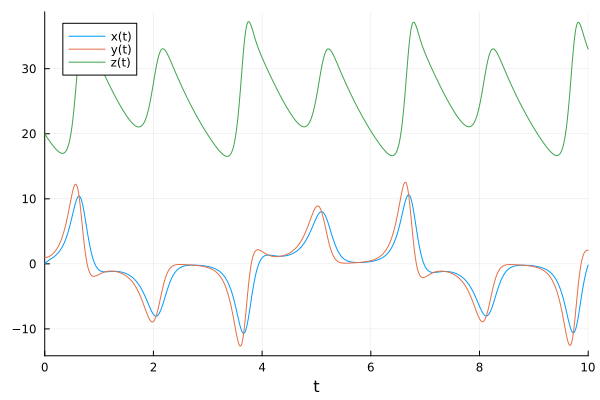

In [112]:
using Plots
plot(solution, label = ["x(t)" "y(t)" "z(t)"])

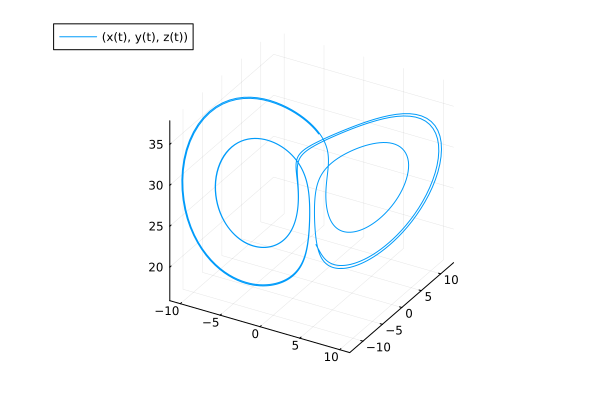

In [44]:
plot(solution, idxs = (1, 2, 3), label = "(x(t), y(t), z(t))")

## Approximating $\pi$ by Monte Carlo simulation

Here, we consider an example of approximating $\pi$ number based on _geometric probabilities_.

_**Given a unit square and a quarter circle inscribed in the square, what is the probability that a random point inside the square belongs to the quarter circle**_?

The unswer is obtained py the formula:

$$
P=\Pr(\text{a random point inside a unit square belongs to a quarter circle}) = \frac{Area(\text{quarter circle})}{Area(\text{square})} = \frac{\frac{\pi}{4}}{1} = \frac{\pi}{4}\Leftrightarrow \pi = 4P.
$$

$P$ can be approximated as a proportion of random points sampled within a unit square, belonging to the quarter circle:

$$
P\approx\frac{n}{N},
$$

where $N$ is a total number of sampled points, and $n$ is a number of sampled points inside a quarter circle. Then,

$$
\pi\approx 4\frac{n}{N}.
$$

A point is represented by $(x, y)$ coordinates, where both $x$ and $y$ are independent samples from the _Uniform(0, 1)_ distribution. 
 


In [119]:
# we use a Distributions package
using Distributions
using Random

Random.seed!(323)

# setting N
N = 10000

# sampling x, y
distr = Uniform(0, 1)
x, y = rand(distr, N), rand(distr, N)

# checking what points are inside a quarter circle
inside = x.^2 + y.^2 .<= 1

# number of points inside 
n = sum(inside)

# approximating pi
pi_approx = 4 * n/N


3.1416

Let's make some visualization, using `Plots` package.

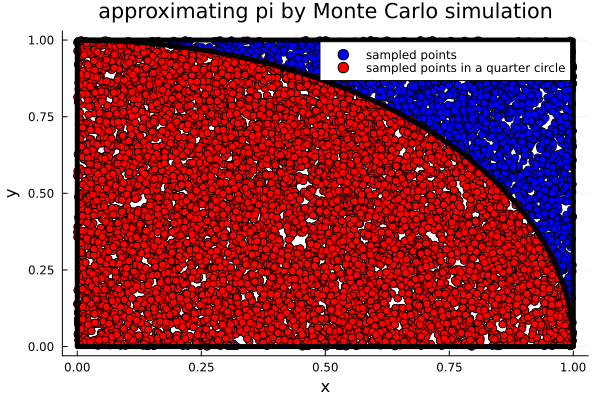

In [121]:
using Plots

# points inside a square
scatter(x, y, color = "blue", label = "sampled points")

# points inside a square
scatter!(x[inside], y[inside], color = "red", label = "sampled points in a quarter circle")

# plotting bounds of the unit square
plot!([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], label = "", color = "black", linewidth = 5)

# plotting bounds of the quarter circle
t = LinRange(0, 0.5, 100) .* pi
plot!(cos.(t), sin.(t), label = "", color = "black", linewidth = 5)

# setting labels
xlabel!("x")
ylabel!("y")
title!("approximating pi by Monte Carlo simulation")


We can also visualize how approximation performs with $N$ increasing.

In [123]:
using DataFrames
using Distributions
using Plots

N = 10000
distr = Uniform(0, 1)

df = DataFrame(N = 1:N, x = rand(distr, N), y = rand(distr, N))



10000×3 DataFrame
   Row │ N      x          y         
       │ Int64  Float64    Float64   
───────┼─────────────────────────────
     1 │     1  0.0242718  0.597697
     2 │     2  0.463323   0.230714
     3 │     3  0.444139   0.515482
     4 │     4  0.0327429  0.395768
     5 │     5  0.310834   0.812583
     6 │     6  0.970614   0.247853
     7 │     7  0.344902   0.788914
     8 │     8  0.666347   0.735482
   ⋮   │   ⋮        ⋮          ⋮
  9994 │  9994  0.0118008  0.11986
  9995 │  9995  0.922936   0.538847
  9996 │  9996  0.676136   0.34733
  9997 │  9997  0.862901   0.66322
  9998 │  9998  0.79794    0.54438
  9999 │  9999  0.907901   0.508399
 10000 │ 10000  0.0213986  0.0510593
                    9985 rows omitted

In [124]:
transform!(df, [:x, :y] => ByRow((x, y) -> x^2 + y^2 <= 1) => :inside)

10000×4 DataFrame
   Row │ N      x          y          inside 
       │ Int64  Float64    Float64    Bool   
───────┼─────────────────────────────────────
     1 │     1  0.0242718  0.597697     true
     2 │     2  0.463323   0.230714     true
     3 │     3  0.444139   0.515482     true
     4 │     4  0.0327429  0.395768     true
     5 │     5  0.310834   0.812583     true
     6 │     6  0.970614   0.247853    false
     7 │     7  0.344902   0.788914     true
     8 │     8  0.666347   0.735482     true
   ⋮   │   ⋮        ⋮          ⋮        ⋮
  9994 │  9994  0.0118008  0.11986      true
  9995 │  9995  0.922936   0.538847    false
  9996 │  9996  0.676136   0.34733      true
  9997 │  9997  0.862901   0.66322     false
  9998 │  9998  0.79794    0.54438      true
  9999 │  9999  0.907901   0.508399    false
 10000 │ 10000  0.0213986  0.0510593    true
                            9985 rows omitted

In [58]:
transform!(df, :inside => cumsum => :n)

10000×5 DataFrame
   Row │ N      x          y           inside  n     
       │ Int64  Float64    Float64     Bool    Int64 
───────┼─────────────────────────────────────────────
     1 │     1  0.937291   0.910217     false      0
     2 │     2  0.479809   0.302201      true      1
     3 │     3  0.803245   0.675177     false      1
     4 │     4  0.706525   0.133479      true      2
     5 │     5  0.684014   0.231826      true      3
     6 │     6  0.160525   0.591107      true      4
     7 │     7  0.170088   0.847156      true      5
     8 │     8  0.817084   0.0890979     true      6
   ⋮   │   ⋮        ⋮          ⋮         ⋮       ⋮
  9994 │  9994  0.114749   0.25249       true   7823
  9995 │  9995  0.488286   0.642225      true   7824
  9996 │  9996  0.156331   0.671604      true   7825
  9997 │  9997  0.462611   0.175358      true   7826
  9998 │  9998  0.579269   0.587911      true   7827
  9999 │  9999  0.313504   0.988849     false   7827
 10000 │ 10000  0.716604   0.430985      true   7828
                                    9985 rows omitted

In [59]:
transform!(df, [:n, :N] => ByRow((n, N) -> 4*n/N) => :approx_pi)

10000×6 DataFrame
   Row │ N      x          y           inside  n      approx_pi 
       │ Int64  Float64    Float64     Bool    Int64  Float64   
───────┼────────────────────────────────────────────────────────
     1 │     1  0.937291   0.910217     false      0    0.0
     2 │     2  0.479809   0.302201      true      1    2.0
     3 │     3  0.803245   0.675177     false      1    1.33333
     4 │     4  0.706525   0.133479      true      2    2.0
     5 │     5  0.684014   0.231826      true      3    2.4
     6 │     6  0.160525   0.591107      true      4    2.66667
     7 │     7  0.170088   0.847156      true      5    2.85714
     8 │     8  0.817084   0.0890979     true      6    3.0
   ⋮   │   ⋮        ⋮          ⋮         ⋮       ⋮        ⋮
  9994 │  9994  0.114749   0.25249       true   7823    3.13108
  9995 │  9995  0.488286   0.642225      true   7824    3.13117
  9996 │  9996  0.156331   0.671604      true   7825    3.13125
  9997 │  9997  0.462611   0.175358      true   7826    3.13134
  9998 │  9998  0.579269   0.587911      true   7827    3.13143
  9999 │  9999  0.313504   0.988849     false   7827    3.13111
 10000 │ 10000  0.716604   0.430985      true   7828    3.1312
                                               9985 rows omitted

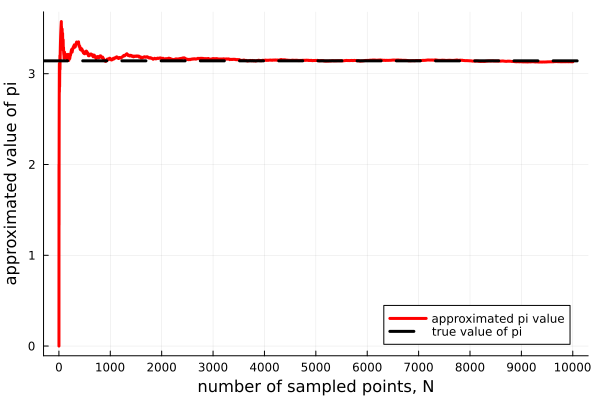

In [71]:
plot(df[:, :N], df[:, :approx_pi], label = "approximated pi value", linewidth = 3, color = :red)
hline!([pi], color = :black, linestyle = :dash, linewidth = 3, label = "true value of pi")
xlabel!("number of sampled points, N")
ylabel!("approximated value of pi")
xticks!(0:1000:N)